# Classification of time series using LSTM. Modified from Keras tutorial using 1D CNN: https://keras.io/examples/timeseries/timeseries_classification_from_scratch/

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Prepare the FordA dataset.

In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

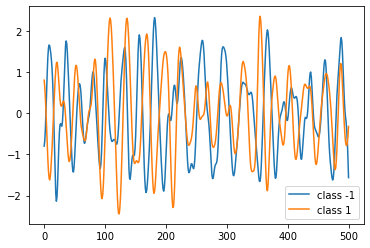

In [3]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [4]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [5]:
num_classes = len(np.unique(y_train))

In [6]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [7]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

## Construct the model with LSTM, dense layers, batch norm and ReLU.

In [8]:
keras.backend.clear_session()

2022-10-01 19:30:42.392540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 19:30:42.511852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 19:30:42.512629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 19:30:42.515215: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

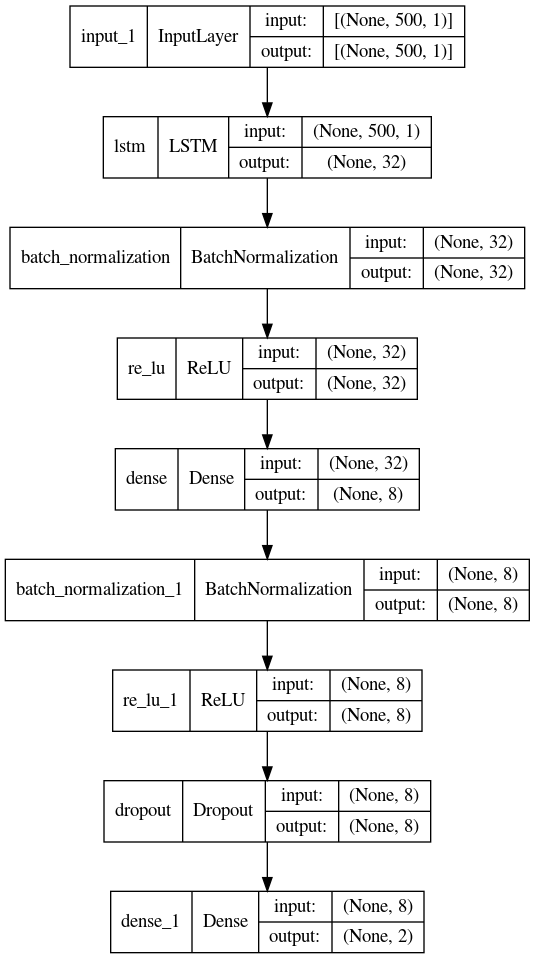

In [9]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    lstm_out = keras.layers.LSTM(32)(input_layer)
    lstm_out = keras.layers.BatchNormalization()(lstm_out)
    lstm_out = keras.layers.ReLU()(lstm_out)

    lstm_out = keras.layers.Dense(8)(lstm_out)
    lstm_out = keras.layers.BatchNormalization()(lstm_out)
    lstm_out = keras.layers.ReLU()(lstm_out)
    lstm_out = keras.layers.Dropout(.4)(lstm_out)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(lstm_out)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

## Train and test the model.

In [10]:
epochs = 2000
batch_size = 128

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=100, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=500, verbose=1),
]
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=.001),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/2000


2022-10-01 19:30:54.944648: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8200


23/23 [==============================] - 7s 46ms/step - loss: 0.7837 - sparse_categorical_accuracy: 0.5024 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.5146 - lr: 0.0010
Epoch 2/2000
23/23 [==============================] - 0s 20ms/step - loss: 0.7379 - sparse_categorical_accuracy: 0.5076 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5118 - lr: 0.0010
Epoch 3/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.7251 - sparse_categorical_accuracy: 0.5128 - val_loss: 0.6936 - val_sparse_categorical_accuracy: 0.5146 - lr: 0.0010
Epoch 4/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.7170 - sparse_categorical_accuracy: 0.5222 - val_loss: 0.6944 - val_sparse_categorical_accuracy: 0.5104 - lr: 0.0010
Epoch 5/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.7167 - sparse_categorical_accuracy: 0.5003 - val_loss: 0.6948 - val_sparse_categorical_accuracy: 0.5132 - lr: 0.0010
Epoch 6/2000
23/23 [=======================

23/23 [==============================] - 0s 18ms/step - loss: 0.4945 - sparse_categorical_accuracy: 0.7521 - val_loss: 1.8547 - val_sparse_categorical_accuracy: 0.5173 - lr: 0.0010
Epoch 86/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.4564 - sparse_categorical_accuracy: 0.7788 - val_loss: 0.9066 - val_sparse_categorical_accuracy: 0.6699 - lr: 0.0010
Epoch 87/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.4815 - sparse_categorical_accuracy: 0.7660 - val_loss: 0.9437 - val_sparse_categorical_accuracy: 0.5090 - lr: 0.0010
Epoch 88/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.4618 - sparse_categorical_accuracy: 0.7590 - val_loss: 0.3650 - val_sparse_categorical_accuracy: 0.9029 - lr: 0.0010
Epoch 89/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.4044 - sparse_categorical_accuracy: 0.8253 - val_loss: 0.6107 - val_sparse_categorical_accuracy: 0.6755 - lr: 0.0010
Epoch 90/2000
23/23 [==================

Epoch 127/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.2057 - sparse_categorical_accuracy: 0.9257 - val_loss: 0.2196 - val_sparse_categorical_accuracy: 0.9182 - lr: 0.0010
Epoch 128/2000
23/23 [==============================] - 0s 20ms/step - loss: 0.2010 - sparse_categorical_accuracy: 0.9233 - val_loss: 0.1741 - val_sparse_categorical_accuracy: 0.9459 - lr: 0.0010
Epoch 129/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.2331 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.2615 - val_sparse_categorical_accuracy: 0.9043 - lr: 0.0010
Epoch 130/2000
23/23 [==============================] - 0s 21ms/step - loss: 0.2481 - sparse_categorical_accuracy: 0.9024 - val_loss: 0.1685 - val_sparse_categorical_accuracy: 0.9390 - lr: 0.0010
Epoch 131/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.2043 - sparse_categorical_accuracy: 0.9285 - val_loss: 0.1526 - val_sparse_categorical_accuracy: 0.9417 - lr: 0.0010
Epoch 132/2000
23/23

Epoch 169/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1832 - sparse_categorical_accuracy: 0.9340 - val_loss: 0.1605 - val_sparse_categorical_accuracy: 0.9404 - lr: 0.0010
Epoch 170/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1820 - sparse_categorical_accuracy: 0.9240 - val_loss: 0.1748 - val_sparse_categorical_accuracy: 0.9376 - lr: 0.0010
Epoch 171/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1798 - sparse_categorical_accuracy: 0.9299 - val_loss: 0.1822 - val_sparse_categorical_accuracy: 0.9417 - lr: 0.0010
Epoch 172/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1735 - sparse_categorical_accuracy: 0.9344 - val_loss: 0.1803 - val_sparse_categorical_accuracy: 0.9362 - lr: 0.0010
Epoch 173/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1912 - sparse_categorical_accuracy: 0.9278 - val_loss: 0.2690 - val_sparse_categorical_accuracy: 0.9307 - lr: 0.0010
Epoch 174/2000
23/23

Epoch 211/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1936 - sparse_categorical_accuracy: 0.9264 - val_loss: 0.1505 - val_sparse_categorical_accuracy: 0.9431 - lr: 0.0010
Epoch 212/2000
23/23 [==============================] - 0s 20ms/step - loss: 0.1913 - sparse_categorical_accuracy: 0.9281 - val_loss: 0.2605 - val_sparse_categorical_accuracy: 0.9029 - lr: 0.0010
Epoch 213/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1873 - sparse_categorical_accuracy: 0.9292 - val_loss: 0.2226 - val_sparse_categorical_accuracy: 0.9057 - lr: 0.0010
Epoch 214/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1973 - sparse_categorical_accuracy: 0.9208 - val_loss: 0.3033 - val_sparse_categorical_accuracy: 0.8807 - lr: 0.0010
Epoch 215/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1819 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.1876 - val_sparse_categorical_accuracy: 0.9320 - lr: 0.0010
Epoch 216/2000
23/23

23/23 [==============================] - 0s 18ms/step - loss: 0.1420 - sparse_categorical_accuracy: 0.9424 - val_loss: 0.1588 - val_sparse_categorical_accuracy: 0.9417 - lr: 5.0000e-04
Epoch 294/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1474 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.1692 - val_sparse_categorical_accuracy: 0.9390 - lr: 5.0000e-04
Epoch 295/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1527 - sparse_categorical_accuracy: 0.9330 - val_loss: 0.2251 - val_sparse_categorical_accuracy: 0.9085 - lr: 5.0000e-04
Epoch 296/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1684 - sparse_categorical_accuracy: 0.9306 - val_loss: 0.1771 - val_sparse_categorical_accuracy: 0.9320 - lr: 5.0000e-04
Epoch 297/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1501 - sparse_categorical_accuracy: 0.9441 - val_loss: 0.1738 - val_sparse_categorical_accuracy: 0.9417 - lr: 5.0000e-04
Epoch 298/2000


23/23 [==============================] - 0s 19ms/step - loss: 0.1463 - sparse_categorical_accuracy: 0.9368 - val_loss: 0.1796 - val_sparse_categorical_accuracy: 0.9404 - lr: 5.0000e-04
Epoch 335/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1444 - sparse_categorical_accuracy: 0.9441 - val_loss: 0.2926 - val_sparse_categorical_accuracy: 0.9126 - lr: 5.0000e-04
Epoch 336/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1465 - sparse_categorical_accuracy: 0.9368 - val_loss: 0.2273 - val_sparse_categorical_accuracy: 0.9223 - lr: 5.0000e-04
Epoch 337/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1478 - sparse_categorical_accuracy: 0.9451 - val_loss: 0.1990 - val_sparse_categorical_accuracy: 0.9362 - lr: 5.0000e-04
Epoch 338/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1440 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.2004 - val_sparse_categorical_accuracy: 0.9390 - lr: 5.0000e-04
Epoch 339/2000


23/23 [==============================] - 0s 18ms/step - loss: 0.1355 - sparse_categorical_accuracy: 0.9438 - val_loss: 0.1810 - val_sparse_categorical_accuracy: 0.9404 - lr: 2.5000e-04
Epoch 376/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1305 - sparse_categorical_accuracy: 0.9448 - val_loss: 0.1812 - val_sparse_categorical_accuracy: 0.9404 - lr: 2.5000e-04
Epoch 377/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1578 - sparse_categorical_accuracy: 0.9396 - val_loss: 0.1923 - val_sparse_categorical_accuracy: 0.9348 - lr: 2.5000e-04
Epoch 378/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1460 - sparse_categorical_accuracy: 0.9455 - val_loss: 0.2236 - val_sparse_categorical_accuracy: 0.9307 - lr: 2.5000e-04
Epoch 379/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.1786 - val_sparse_categorical_accuracy: 0.9431 - lr: 2.5000e-04
Epoch 380/2000


23/23 [==============================] - 0s 18ms/step - loss: 0.1272 - sparse_categorical_accuracy: 0.9462 - val_loss: 0.2054 - val_sparse_categorical_accuracy: 0.9404 - lr: 2.5000e-04
Epoch 417/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1368 - sparse_categorical_accuracy: 0.9458 - val_loss: 0.1994 - val_sparse_categorical_accuracy: 0.9376 - lr: 2.5000e-04
Epoch 418/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1258 - sparse_categorical_accuracy: 0.9493 - val_loss: 0.1868 - val_sparse_categorical_accuracy: 0.9445 - lr: 2.5000e-04
Epoch 419/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1328 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.1896 - val_sparse_categorical_accuracy: 0.9390 - lr: 2.5000e-04
Epoch 420/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1262 - sparse_categorical_accuracy: 0.9479 - val_loss: 0.1910 - val_sparse_categorical_accuracy: 0.9348 - lr: 2.5000e-04
Epoch 421/2000


23/23 [==============================] - 0s 18ms/step - loss: 0.1191 - sparse_categorical_accuracy: 0.9497 - val_loss: 0.2026 - val_sparse_categorical_accuracy: 0.9376 - lr: 1.2500e-04
Epoch 458/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1168 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.1977 - val_sparse_categorical_accuracy: 0.9390 - lr: 1.2500e-04
Epoch 459/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1243 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.2140 - val_sparse_categorical_accuracy: 0.9445 - lr: 1.2500e-04
Epoch 460/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1215 - sparse_categorical_accuracy: 0.9472 - val_loss: 0.2509 - val_sparse_categorical_accuracy: 0.9320 - lr: 1.2500e-04
Epoch 461/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1206 - sparse_categorical_accuracy: 0.9524 - val_loss: 0.2128 - val_sparse_categorical_accuracy: 0.9376 - lr: 1.2500e-04
Epoch 462/2000


23/23 [==============================] - 0s 19ms/step - loss: 0.1152 - sparse_categorical_accuracy: 0.9552 - val_loss: 0.2177 - val_sparse_categorical_accuracy: 0.9376 - lr: 1.2500e-04
Epoch 499/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1218 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.2087 - val_sparse_categorical_accuracy: 0.9404 - lr: 1.2500e-04
Epoch 500/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1155 - sparse_categorical_accuracy: 0.9524 - val_loss: 0.2662 - val_sparse_categorical_accuracy: 0.9307 - lr: 1.2500e-04
Epoch 501/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1225 - sparse_categorical_accuracy: 0.9472 - val_loss: 0.2834 - val_sparse_categorical_accuracy: 0.9237 - lr: 1.2500e-04
Epoch 502/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1198 - sparse_categorical_accuracy: 0.9458 - val_loss: 0.2640 - val_sparse_categorical_accuracy: 0.9307 - lr: 1.2500e-04
Epoch 503/2000


23/23 [==============================] - 0s 18ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.2237 - val_sparse_categorical_accuracy: 0.9334 - lr: 1.2500e-04
Epoch 540/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1210 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.2850 - val_sparse_categorical_accuracy: 0.9251 - lr: 1.2500e-04
Epoch 541/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1107 - sparse_categorical_accuracy: 0.9590 - val_loss: 0.2448 - val_sparse_categorical_accuracy: 0.9348 - lr: 1.2500e-04
Epoch 542/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9542 - val_loss: 0.2179 - val_sparse_categorical_accuracy: 0.9362 - lr: 1.2500e-04
Epoch 543/2000
23/23 [==============================] - 0s 20ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9559 - val_loss: 0.2116 - val_sparse_categorical_accuracy: 0.9404 - lr: 1.2500e-04
Epoch 544/2000


23/23 [==============================] - 0s 19ms/step - loss: 0.1092 - sparse_categorical_accuracy: 0.9545 - val_loss: 0.2270 - val_sparse_categorical_accuracy: 0.9417 - lr: 1.0000e-04
Epoch 581/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1190 - sparse_categorical_accuracy: 0.9493 - val_loss: 0.2484 - val_sparse_categorical_accuracy: 0.9279 - lr: 1.0000e-04
Epoch 582/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1097 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.2532 - val_sparse_categorical_accuracy: 0.9348 - lr: 1.0000e-04
Epoch 583/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1166 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.2231 - val_sparse_categorical_accuracy: 0.9362 - lr: 1.0000e-04
Epoch 584/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1066 - sparse_categorical_accuracy: 0.9538 - val_loss: 0.2241 - val_sparse_categorical_accuracy: 0.9404 - lr: 1.0000e-04
Epoch 585/2000


23/23 [==============================] - 0s 19ms/step - loss: 0.1033 - sparse_categorical_accuracy: 0.9566 - val_loss: 0.2551 - val_sparse_categorical_accuracy: 0.9348 - lr: 1.0000e-04
Epoch 622/2000
23/23 [==============================] - 0s 20ms/step - loss: 0.1083 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.2309 - val_sparse_categorical_accuracy: 0.9417 - lr: 1.0000e-04
Epoch 623/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1085 - sparse_categorical_accuracy: 0.9483 - val_loss: 0.2466 - val_sparse_categorical_accuracy: 0.9376 - lr: 1.0000e-04
Epoch 624/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1107 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.2403 - val_sparse_categorical_accuracy: 0.9293 - lr: 1.0000e-04
Epoch 625/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1049 - sparse_categorical_accuracy: 0.9497 - val_loss: 0.2778 - val_sparse_categorical_accuracy: 0.9348 - lr: 1.0000e-04
Epoch 626/2000


23/23 [==============================] - 0s 18ms/step - loss: 0.1052 - sparse_categorical_accuracy: 0.9549 - val_loss: 0.2660 - val_sparse_categorical_accuracy: 0.9334 - lr: 1.0000e-04
Epoch 663/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1021 - sparse_categorical_accuracy: 0.9563 - val_loss: 0.2594 - val_sparse_categorical_accuracy: 0.9307 - lr: 1.0000e-04
Epoch 664/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9542 - val_loss: 0.2609 - val_sparse_categorical_accuracy: 0.9334 - lr: 1.0000e-04
Epoch 665/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1137 - sparse_categorical_accuracy: 0.9542 - val_loss: 0.2463 - val_sparse_categorical_accuracy: 0.9376 - lr: 1.0000e-04
Epoch 666/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1051 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.2410 - val_sparse_categorical_accuracy: 0.9307 - lr: 1.0000e-04
Epoch 667/2000


23/23 [==============================] - 0s 18ms/step - loss: 0.0984 - sparse_categorical_accuracy: 0.9573 - val_loss: 0.3262 - val_sparse_categorical_accuracy: 0.9237 - lr: 1.0000e-04
Epoch 704/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1087 - sparse_categorical_accuracy: 0.9510 - val_loss: 0.2538 - val_sparse_categorical_accuracy: 0.9293 - lr: 1.0000e-04
Epoch 705/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.1016 - sparse_categorical_accuracy: 0.9559 - val_loss: 0.2393 - val_sparse_categorical_accuracy: 0.9334 - lr: 1.0000e-04
Epoch 706/2000
23/23 [==============================] - 0s 18ms/step - loss: 0.0967 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.2747 - val_sparse_categorical_accuracy: 0.9293 - lr: 1.0000e-04
Epoch 707/2000
23/23 [==============================] - 0s 19ms/step - loss: 0.1027 - sparse_categorical_accuracy: 0.9583 - val_loss: 0.2860 - val_sparse_categorical_accuracy: 0.9279 - lr: 1.0000e-04
Epoch 708/2000


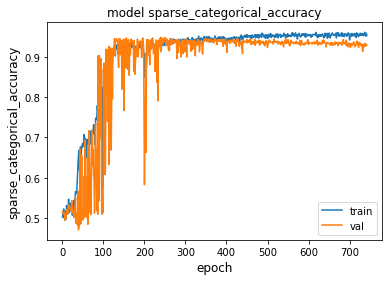

In [12]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [13]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 1s 10ms/step - loss: 0.1560 - sparse_categorical_accuracy: 0.9477
Test accuracy 0.9477272629737854
Test loss 0.15601758658885956
